In [4]:
# Importing some important libraries which will help us in analyzing the dataset
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px

# Data Exploring

In [5]:
# Read the csv file 
airbnb = pd.read_csv("listings.csv")

In [6]:
# Check the content of the DataFrame
airbnb.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [6]:
airbnb.shape

(8386, 75)

# Data Wrangling (Cleaning & Manipulation)


In [7]:
# Drop unnecessary features 
selected_columns = ['host_id','neighbourhood','latitude','longitude',"host_neighbourhood",'room_type','price','minimum_nights','reviews_per_month','number_of_reviews','calculated_host_listings_count','review_scores_rating','availability_365','number_of_reviews_ltm']
airbnb = airbnb[selected_columns]

In [8]:
# Save the new CSV file 
airbnb.to_csv("airbnb.csv")


In [9]:
airbnb.head()

,host_id,neighbourhood,latitude,longitude,host_neighbourhood,room_type,price,minimum_nights,reviews_per_month,number_of_reviews,calculated_host_listings_count,review_scores_rating,availability_365,number_of_reviews_ltm
0,4013546,"Amsterdam, North Holland, Netherlands",52.40164,4.95106,Nieuwendam-Noord,Private room,$61.00,3,2.30,303,2,4.74,272,26
1,3678216,"Amsterdam, North Holland, Netherlands",52.38855,4.88521,Westelijke Eilanden,Entire home/apt,$327.00,3,0.64,78,1,4.83,16,6
2,3877342,"Amsterdam, North Holland, Netherlands",52.37824,4.86826,Oud-West,Private room,$109.00,2,2.73,341,3,4.82,29,43
3,4068486,"Amsterdam, North Holland, Netherlands",52.34091,4.84802,Oud-Zuid,Entire home/apt,$290.00,3,0.11,10,1,5.00,0,0
4,2313061,"Amsterdam, Noord-Holland, Netherlands",52.37641,4.88303,Jordaan,Private room,$150.00,1,6.62,699,2,4.89,196,110


In [10]:
airbnb.shape

(8386, 14)

In [11]:
# Descriptive statistics
numerical_features = ["price", "minimum_nights", "availability_365","host_neighbourhood","number_of_reviews", "reviews_per_month",'calculated_host_listings_count',"review_scores_rating",'number_of_reviews_ltm']
categorical_features = ["room_type"]

In [13]:
# Calculate descriptive statistics for numeric features
numerical_stats = airbnb[numerical_features].describe()
# Count unique values for categorical features
categorical_counts = airbnb[categorical_features].nunique()

In [14]:
# Are There any missing ?.
airbnb.isna().sum()

host_id                              0
neighbourhood                     3178
latitude                             0
longitude                            0
host_neighbourhood                5342
room_type                            0
price                                0
minimum_nights                       0
reviews_per_month                  830
number_of_reviews                    0
calculated_host_listings_count       0
review_scores_rating               830
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(strategy="mean", missing_values=np.nan )
airbnb["reviews_per_month"] = mean_imp.fit_transform(airbnb["reviews_per_month"].values.reshape(-1,1))
airbnb["review_scores_rating"] = mean_imp.fit_transform(airbnb["review_scores_rating"].values.reshape(-1,1))

mode_imp = SimpleImputer(strategy="most_frequent", missing_values=np.nan )
airbnb["neighbourhood"] = mode_imp.fit_transform(airbnb["neighbourhood"].values.reshape(-1,1))
airbnb["host_neighbourhood"] = mode_imp.fit_transform(airbnb["host_neighbourhood"].values.reshape(-1,1))



In [20]:
airbnb.isna().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
host_neighbourhood                0
room_type                         0
price                             0
minimum_nights                    0
reviews_per_month                 0
number_of_reviews                 0
calculated_host_listings_count    0
review_scores_rating              0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

# Data Analysis & Visulaization (EDA & Statistical Analysis)

In [17]:
# Grouping the dataset by categorical columns like room_type and calculate aggregate statistics such as average price for each group \
airbnb["price"] = airbnb["price"].str.replace("$","").str.replace(',','').astype(float)
average_price_by_property_type = airbnb.groupby("room_type")["price"].mean()
average_price_by_property_type

C:\Users\DELL\AppData\Local\Temp\ipykernel_10440\2480278763.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb["price"] = airbnb["price"].str.replace("$","").str.replace(',','').astype(float)


room_type
Entire home/apt    278.687201
Hotel room         213.962963
Private room       171.790403
Shared room        144.880952
Name: price, dtype: float64

In [18]:
# Calculate correlation coefficient between price and review_scores_rating
corr = airbnb["price"].astype(float).corr(airbnb["review_scores_rating"].astype(float))
print("Correlation between price and review scores:", corr)


Correlation between price and review scores: 0.02891303499840722


In [19]:
# Grouping the dataset by categorical columns like room_type and calculate aggregate statistics such as average price for each group 
average_avl_by_property_type = airbnb.groupby("room_type")["availability_365"].mean().sort_values()
average_avl_by_property_type

room_type
Entire home/apt     65.516288
Private room       139.553778
Shared room        170.523810
Hotel room         186.092593
Name: availability_365, dtype: float64

In [49]:
# Determine most popular room types based on number of listings
popular_room_types = airbnb["room_type"].value_counts().idxmax()
print("Most Popular Room Type:", popular_room_types)

Most Popular Room Type: Entire home/apt


In [57]:
# Identify neighborhoods with highest average review scores
top_neighborhoods = airbnb.groupby("host_neighbourhood")["review_scores_rating"].mean().nlargest(5)
print("Top Neighborhoods by Average Review Scores:")
print(top_neighborhoods)

Top Neighborhoods by Average Review Scores:
host_neighbourhood
Brockley                        5.0
Corvin-Negyed                   5.0
Józsefváros - District VIII.    5.0
Merkaz HaIr                     5.0
Woodley Park                    5.0
Name: review_scores_rating, dtype: float64


# Data Visualizations

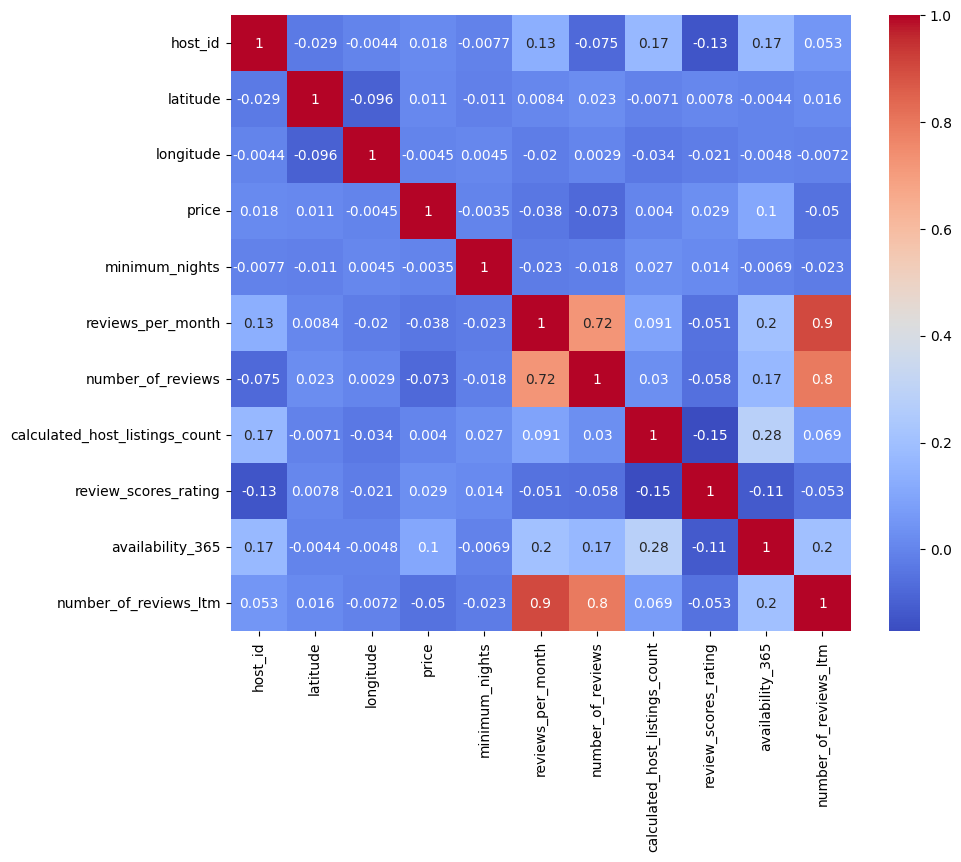

In [21]:
# Correlation analysis
correlation_matrix = airbnb.corr(numeric_only=True)
# Visualize the correlation matrix using a heatmap
plt.figure(figsize = (10 , 8))
sns.heatmap(correlation_matrix , annot = True , cmap = "coolwarm")
plt.show()

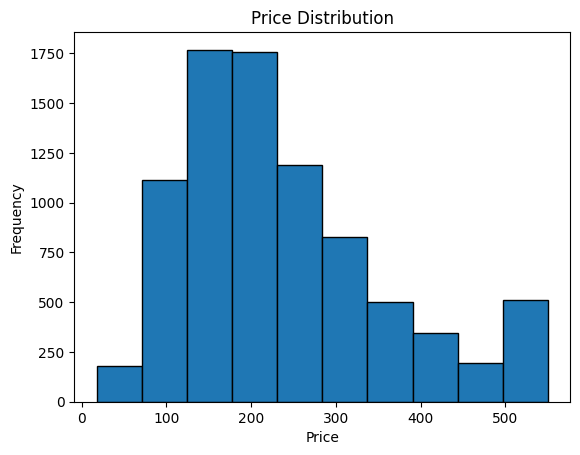

In [75]:
lower_limit = 0
upper_limit = 550
airbnb['price'] = airbnb['price'].apply(lambda x: min(max(x, lower_limit), upper_limit))
plt.hist(airbnb['price'],edgecolor="black")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


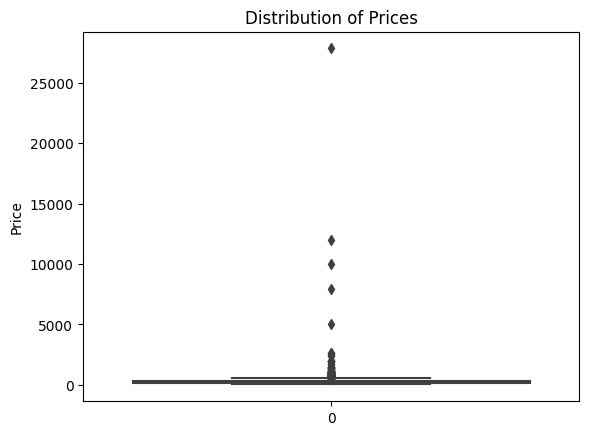

In [63]:
# Price Distribution (Box Plot)
sns.boxplot(airbnb['price'])
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [24]:
lower_limit = 0
upper_limit = 550
airbnb['price'] = airbnb['price'].apply(lambda x: min(max(x, lower_limit), upper_limit))

In [25]:
fig = px.scatter_mapbox(
    airbnb,  # Our DataFrame
    lat='latitude',
    lon='longitude',
    width=650,  # Width of map
    height=700,  # Height of map
    color='price',
    hover_data=["price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

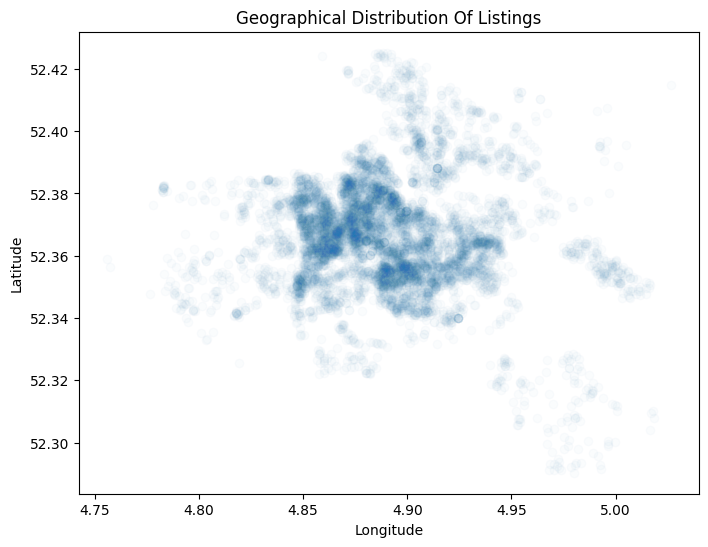

In [26]:
# Scatter plot of latitude and longitude
plt.figure(figsize = (8,6))
plt.scatter(airbnb["longitude"] , airbnb['latitude'] , alpha=0.02)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution Of Listings")
plt.show()

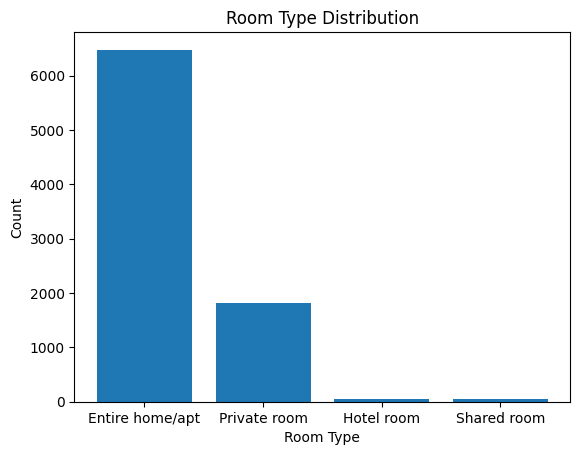

In [68]:
# Making a bar chart
room_type_counts = airbnb['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

In [69]:
# Making a scatter plot
fig = px.scatter(airbnb, x='price', y='room_type', title='Scatter Plot: Price vs. Room Type')
fig.show()

In [70]:
# Making a scatter plot
fig = px.scatter(airbnb, x='price', y='neighbourhood', title='Scatter Plot: Price vs. Room Type')
fig.show()

In [72]:
# Making a pie chart
fig = px.pie(airbnb, values='price', names='neighbourhood', title="Distribution of Prices by Neighborhood")
fig.show()

In [73]:
# Making a pie chart
fig = px.pie(airbnb, values='price', names='room_type', title="Distribution of Prices by Neighborhood")
fig.show()

In [74]:
# Making a pie chart

fig = px.scatter_3d(airbnb, x='price', y='longitude', z='latitude',
              color='room_type')
fig.show()